In [24]:
import sys
sys.path.append('../app/')

import preprocess
import featureprocess
import fileio
import evaluation
import numpy as np
import modelacc
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfoff,dftest,dfon = fileio.read_all()

# 1、数据总览

In [3]:
dfoff.head(2)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN


In [4]:
dftest.head(2)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706


In [5]:
dfon.head(2)

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,NaN,NaN,NaN,20160321.0


# 2、线下单特征测试

In [6]:
#dfoff :打标签;无券-1；有券且15天内消费1；其他0（包括有券不消费、有券15天后消费）
#dfall :标签！=-1
dfoff,dfall,train,valid = preprocess.preprocess(dfoff)

In [7]:
#留个档
dfori = dfall.copy()
dfori.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,label
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN,0
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN,0
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN,0
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN,0
6,1439408,2632,8591.0,20:1,0.0,20160516.0,20160613.0,0


In [8]:
#dfall特征处理
dfall = featureprocess.process_features_main(dfall)

In [9]:
dfall.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,label,discount_rate,discount_man,discount_jian,discount_type,weekday,weekday_type,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,UM_id,用户id,只领券,核销数,直接买,单商铺最大购买次数,成交商家数
0,1439408,4663,11002.0,150:20,1,20160528.0,NaN,0,0.866667,150,20,1,6,1,0,0,0,0,0,1,0,1439408_4663,NaN,1.0,0.0,0.0,1.0,1.0
1,1439408,2632,8591.0,20:1,0,20160217.0,NaN,0,0.950000,20,1,1,3,0,0,0,1,0,0,0,0,1439408_2632,1439408_2632,2.0,0.0,0.0,2.0,1.0
2,1439408,2632,1078.0,20:1,0,20160319.0,NaN,0,0.950000,20,1,1,6,1,0,0,0,0,0,1,0,1439408_2632,1439408_2632,2.0,0.0,0.0,2.0,1.0
3,1439408,2632,8591.0,20:1,0,20160613.0,NaN,0,0.950000,20,1,1,1,0,1,0,0,0,0,0,0,1439408_2632,1439408_2632,2.0,0.0,0.0,2.0,1.0
4,1439408,2632,8591.0,20:1,0,20160516.0,20160613.0,0,0.950000,20,1,1,1,0,1,0,0,0,0,0,0,1439408_2632,1439408_2632,2.0,0.0,0.0,2.0,1.0


## 2.1 discount_rate
discount_type:空值为nan,冒号是1，其余是0  
discount_man\jian\rate  

<BarContainer object of 2 artists>

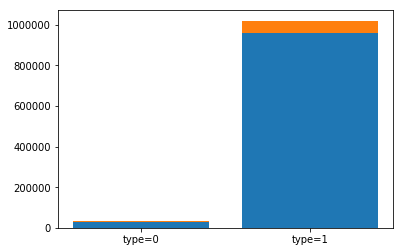

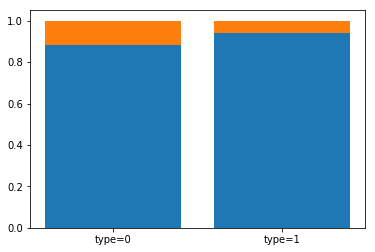

In [210]:
#不同子类，在label01或1的占比,xtype
xticks = ['type=0','type=1']
cc = dfall.groupby('discount_type')['label'].value_counts()
num_label_0 = cc.xs(0,level=1)
num_label_1 = cc.xs(1,level=1)

plt.bar(xticks,num_label_0)
plt.bar(xticks,num_label_1,bottom=num_label_0)


#
plt.figure()
a,b = cc.xs(0)/sum(cc.xs(0))
c,d = cc.xs(1)/sum(cc.xs(1))

xticks = ['type=0','type=1']
cc = dfall.groupby('discount_type')['label'].value_counts()
num_label_0 =a,c
num_label_1 =b,d
plt.bar(xticks,num_label_0)
plt.bar(xticks,num_label_1,bottom=num_label_0)